In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
file_path = r"F:\neuron project with Jesus"

df = pd.read_csv(f"{file_path}/filter_renamed_raw_matrix.csv", index_col = 0)

In [3]:
df.head(10).to_csv(f"{file_path}/df_test.csv")

In [3]:
import seaborn as sn

In [4]:
# ---- Set global font once ----
plt.rcParams["font.family"] = "Arial"

In [5]:
df_tic = df.div(df.sum(), axis=1) * 100000000000

# log transform 
df_log2 = np.log2(df_tic + 1)
df_log2

,CL2_VEH_3d_1,CL2_VEH_3d_2,CL2_VEH_3d_3,CL2_VEH_3d_4,CL2_VEH_3d_5,CL2_VEH_3d_6,CL5_VEH_3d_1,CL5_VEH_3d_2,CL5_VEH_3d_3,CL5_VEH_3d_4,...,CL2_DAPT_16d_3,CL2_DAPT_16d_4,CL2_DAPT_16d_5,CL2_DAPT_16d_6,CL5_DAPT_16d_1,CL5_DAPT_16d_2,CL5_DAPT_16d_3,CL5_DAPT_16d_4,CL5_DAPT_16d_5,CL5_DAPT_16d_6
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,19.723840,20.196765,20.298400,20.790599,20.038074,20.647443,18.982347,19.351459,19.153692,19.262483,...,19.363182,19.706525,19.660784,19.667947,19.691461,19.791788,19.907563,19.847066,19.983190,19.783144
PIGBOS1,15.639988,18.110901,15.899080,16.075119,NaN,NaN,17.779397,15.643589,NaN,17.787980,...,16.414987,16.475192,15.566527,NaN,15.545506,16.836246,16.005762,NaN,16.167923,16.759266
TMEM275,16.736788,15.709888,17.138019,16.199337,16.377051,15.949163,17.340614,16.840560,17.504742,17.651011,...,15.392456,NaN,16.903918,NaN,16.734369,16.731503,16.527622,NaN,16.458146,16.558076
CENPVL1,14.823394,14.799390,13.400189,15.365411,14.810634,14.764379,16.256874,15.752004,16.240736,16.485734,...,13.429863,14.652724,13.894709,15.787267,16.119012,16.316492,15.313515,15.712430,15.558336,15.204086
NBDY,20.551934,20.126515,20.012841,19.868988,20.036799,19.869314,20.024146,19.687992,19.787815,19.879121,...,19.101653,19.821657,18.962412,19.773082,19.444077,19.861170,19.006785,19.171482,19.049676,19.835669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYO16,17.132072,17.164614,16.717745,17.078581,17.366562,16.496281,17.168509,16.513384,17.095005,16.770803,...,17.626241,17.405952,17.705336,17.287401,17.562258,17.813305,17.231631,17.213502,17.611491,17.785852
MORC2,21.540458,21.219938,21.328425,21.355883,21.474620,21.338767,21.437095,21.140386,21.372694,21.112994,...,21.935047,21.932624,21.949375,22.015364,21.506745,21.474897,21.447449,21.590204,21.582274,21.657253
IVNS1ABP,19.693593,19.748508,19.648040,19.917247,20.290187,20.089448,19.570938,19.559290,19.215970,19.434352,...,18.822051,19.076551,19.394542,19.339731,19.474399,19.675202,19.530863,19.544457,19.716405,19.405166


In [6]:
gene = pd.read_excel(f"{file_path}/mmc3.xlsx", sheet_name = "Sheet1")


In [7]:
gene.shape

(118, 6)

In [8]:
new_col = ['Ensembl ID', 'Gene name',
       'Function Snippet', 'Corrective Coefficient',
       'Neuron/NPC RNA level ratio, in vitro',
       'Cortical Cell Type Specificity']

gene.columns = new_col
gene

,Ensembl ID,Gene name,Function Snippet,Corrective Coefficient,"Neuron/NPC RNA level ratio, in vitro",Cortical Cell Type Specificity
0,ENSG00000163995,ABLIM2,Actin binding,0.042605,2.528553,N
1,ENSG00000114948,ADAM23,"Neuron differentiation, molecular mechanism nc...",0.043685,1.370122,N
2,ENSG00000078295,ADCY2,Calcium-cAMP signaling,0.039523,3.417025,"N,A"
3,ENSG00000154027,AK5,Nucleotide metabolism,0.086776,3.463053,"N,O"
4,ENSG00000065413,ANKRD44,Transcription regulator. Calcium-dependent den...,-0.252073,3.748028,"N,O,E,V,M"
...,...,...,...,...,...,...
113,ENSG00000186153,WWOX,Neuronal migration,0.174052,0.733779,"N,A,O,E,V,M"
114,ENSG00000088930,XRN2,Transcription termination,-0.025721,0.405368,"N,E"
115,ENSG00000175048,ZDHHC14,Controls Kv1-family potassium channel clusteri...,0.152808,0.581697,"N,A,O,E,V,M"
116,ENSG00000138311,ZNF365,DNA damage repair,0.12502,11.520654,"N,O"


In [9]:
neuronal = gene[gene["Cortical Cell Type Specificity"] == "N"].iloc[:,1].tolist()

In [10]:
len(neuronal)

50

In [11]:
others = gene[gene["Cortical Cell Type Specificity"] != "N"].iloc[:,1].tolist()

In [12]:
len(others)

68

In [13]:
df_log2

,CL2_VEH_3d_1,CL2_VEH_3d_2,CL2_VEH_3d_3,CL2_VEH_3d_4,CL2_VEH_3d_5,CL2_VEH_3d_6,CL5_VEH_3d_1,CL5_VEH_3d_2,CL5_VEH_3d_3,CL5_VEH_3d_4,...,CL2_DAPT_16d_3,CL2_DAPT_16d_4,CL2_DAPT_16d_5,CL2_DAPT_16d_6,CL5_DAPT_16d_1,CL5_DAPT_16d_2,CL5_DAPT_16d_3,CL5_DAPT_16d_4,CL5_DAPT_16d_5,CL5_DAPT_16d_6
Genes,,,,,,,,,,,,,,,,,,,,,
NUDT4B,19.723840,20.196765,20.298400,20.790599,20.038074,20.647443,18.982347,19.351459,19.153692,19.262483,...,19.363182,19.706525,19.660784,19.667947,19.691461,19.791788,19.907563,19.847066,19.983190,19.783144
PIGBOS1,15.639988,18.110901,15.899080,16.075119,NaN,NaN,17.779397,15.643589,NaN,17.787980,...,16.414987,16.475192,15.566527,NaN,15.545506,16.836246,16.005762,NaN,16.167923,16.759266
TMEM275,16.736788,15.709888,17.138019,16.199337,16.377051,15.949163,17.340614,16.840560,17.504742,17.651011,...,15.392456,NaN,16.903918,NaN,16.734369,16.731503,16.527622,NaN,16.458146,16.558076
CENPVL1,14.823394,14.799390,13.400189,15.365411,14.810634,14.764379,16.256874,15.752004,16.240736,16.485734,...,13.429863,14.652724,13.894709,15.787267,16.119012,16.316492,15.313515,15.712430,15.558336,15.204086
NBDY,20.551934,20.126515,20.012841,19.868988,20.036799,19.869314,20.024146,19.687992,19.787815,19.879121,...,19.101653,19.821657,18.962412,19.773082,19.444077,19.861170,19.006785,19.171482,19.049676,19.835669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MYO16,17.132072,17.164614,16.717745,17.078581,17.366562,16.496281,17.168509,16.513384,17.095005,16.770803,...,17.626241,17.405952,17.705336,17.287401,17.562258,17.813305,17.231631,17.213502,17.611491,17.785852
MORC2,21.540458,21.219938,21.328425,21.355883,21.474620,21.338767,21.437095,21.140386,21.372694,21.112994,...,21.935047,21.932624,21.949375,22.015364,21.506745,21.474897,21.447449,21.590204,21.582274,21.657253
IVNS1ABP,19.693593,19.748508,19.648040,19.917247,20.290187,20.089448,19.570938,19.559290,19.215970,19.434352,...,18.822051,19.076551,19.394542,19.339731,19.474399,19.675202,19.530863,19.544457,19.716405,19.405166


In [14]:
df_neuronal = df_log2[df_log2.index.isin(neuronal)]
df_others = df_log2[df_log2.index.isin(others)]

In [15]:
df_neuronal2 = df_neuronal.dropna()
df_others2 = df_others.dropna()

In [16]:
df_neuronal3 = df_neuronal2.copy()
df_others3 = df_others2.copy()

df_neuronal3.columns  = df_neuronal3.columns.str.replace(r"_\d+$", "", regex=True)
df_others3.columns  = df_others3.columns.str.replace(r"_\d+$", "", regex=True)

In [17]:
df_neuronal_mean = df_neuronal3.groupby(level=0, axis=1).mean()
df_others_mean = df_others3.groupby(level=0, axis=1).mean()

In [18]:
from scipy.stats import zscore

dfz_neuronal_mean = pd.DataFrame(
    zscore(df_neuronal_mean, axis=1, nan_policy="omit"),
    index=df_neuronal_mean.index,
    columns=df_neuronal_mean.columns
)

dfz_others_mean = pd.DataFrame(
    zscore(df_others_mean, axis=1, nan_policy="omit"),
    index=df_others_mean.index,
    columns=df_others_mean.columns
)

In [19]:
dfz_neuronal_mean.shape

(30, 16)

In [20]:
dfz_others_mean.shape

(48, 16)

In [21]:
dfz_others_mean.columns

Index(['CL2_DAPT_16d', 'CL2_DAPT_3d', 'CL2_DAPT_4d', 'CL2_DAPT_8d',
       'CL2_VEH_16d', 'CL2_VEH_3d', 'CL2_VEH_4d', 'CL2_VEH_8d', 'CL5_DAPT_16d',
       'CL5_DAPT_3d', 'CL5_DAPT_4d', 'CL5_DAPT_8d', 'CL5_VEH_16d',
       'CL5_VEH_3d', 'CL5_VEH_4d', 'CL5_VEH_8d'],
      dtype='object')

In [22]:
ordered = [ 'CL2_DAPT_3d', 'CL2_DAPT_4d', 'CL2_DAPT_8d','CL2_DAPT_16d',
            'CL2_VEH_3d', 'CL2_VEH_4d', 'CL2_VEH_8d',  'CL2_VEH_16d',
            'CL5_DAPT_3d', 'CL5_DAPT_4d', 'CL5_DAPT_8d','CL5_DAPT_16d', 
            'CL5_VEH_3d', 'CL5_VEH_4d', 'CL5_VEH_8d','CL5_VEH_16d']

dfz_others_mean2 = dfz_others_mean[ordered]

dfz_neuronal_mean2 = dfz_neuronal_mean[ordered]
dfz_others_mean2

,CL2_DAPT_3d,CL2_DAPT_4d,CL2_DAPT_8d,CL2_DAPT_16d,CL2_VEH_3d,CL2_VEH_4d,CL2_VEH_8d,CL2_VEH_16d,CL5_DAPT_3d,CL5_DAPT_4d,CL5_DAPT_8d,CL5_DAPT_16d,CL5_VEH_3d,CL5_VEH_4d,CL5_VEH_8d,CL5_VEH_16d
Genes,,,,,,,,,,,,,,,,
MEX3A,0.981671,0.919201,0.864993,0.988107,0.285543,0.894739,1.265915,1.250943,-0.493296,-1.137596,-0.342075,-0.408644,-1.430583,-1.181427,-1.487492,-0.969997
DLGAP1,-2.062999,1.137376,0.782407,0.967472,-1.319466,0.340430,1.298664,1.797192,-0.319564,-0.026614,0.050018,-0.787446,-0.276992,-1.043754,-0.052320,-0.484407
NCAM2,-0.337903,2.355899,1.129926,0.116265,0.033505,1.854314,0.283214,-0.182377,-0.017590,0.225299,-1.022063,-1.145968,-0.636899,-0.524619,-0.808730,-1.322273
EML2,-1.506546,-0.654507,0.043560,0.054100,-2.317827,-0.314152,-0.064445,0.204811,0.512666,0.695981,0.678868,1.018761,-1.458535,0.713185,1.069995,1.324087
ITGB1,1.645240,0.595375,-0.466196,-0.542882,1.747067,-0.096772,-1.618638,-1.464992,-0.153912,0.089721,0.316022,0.457758,1.645941,-0.679252,-0.746128,-0.728352
SERPINE2,1.001572,1.934495,0.273273,-0.863445,1.122134,1.713480,0.352236,-0.445740,-0.782930,-1.198317,-0.399268,-1.215404,0.289905,-0.214662,-0.123189,-1.444141
IGF1R,1.310861,0.103750,-1.295591,-1.234918,1.149424,-0.547293,-1.478463,-1.232439,-0.907698,-0.277785,1.347337,1.393329,0.067272,0.562741,0.186104,0.853369
DDX5,2.051365,-0.503948,0.156668,-0.278268,1.264365,0.397409,1.431284,0.649517,0.245581,-0.929411,-0.251564,-0.528259,-2.230187,-0.706238,-0.679833,-0.088481
HNRNPA2B1,0.681172,-0.253330,1.206825,0.578122,-2.086075,0.419314,0.977552,1.122232,0.275304,0.177978,-0.574291,-0.362148,-2.505723,0.151446,-0.062713,0.254334


In [1]:
import seaborn as sns

# clustered heatmap
g = sns.clustermap(
        dfz_others_mean2,
        method="average",        # linkage
        metric="correlation",    # best for expression-style data
        cmap="vlag",
        figsize=(6, 10),
        yticklabels=True,
        row_cluster=True,   # remove Y-axis dendrogram
        col_cluster=False,   # remove X-axis dendrogram
        dendrogram_ratio=(0.1, 0.1),
        cbar_pos=(0.01, 0.75, 0.04, 0.15)
        )


# hide Y-axis dendrogram (rows)
g.ax_row_dendrogram.set_visible(False)
# g.ax_heatmap.set_xlabel("Samples", fontsize=18)
g.ax_heatmap.set_ylabel("Proteins", fontsize=14)
g.ax_heatmap.tick_params(axis='x', labelsize=12, labelcolor='black', rotation=90)
plt.savefig(r"F:\neuron project with Jesus\figures\heatmap_non_neuronal_proteins.svg", 
            dpi=600, bbox_inches="tight")
plt.show()

NameError: name 'dfz_others_mean2' is not defined

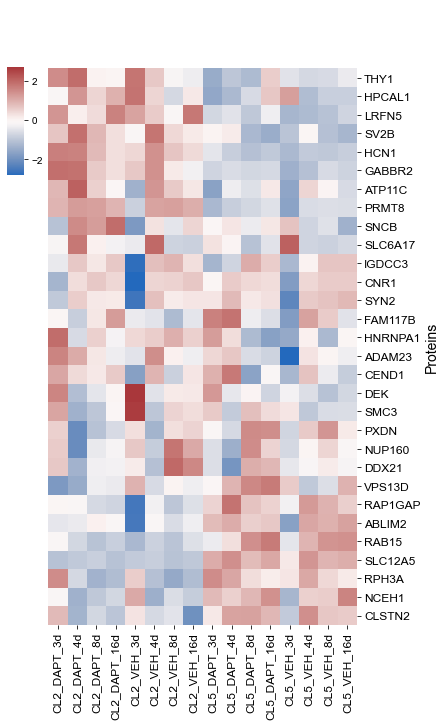

In [24]:
# clustered heatmap
g = sns.clustermap(
        dfz_neuronal_mean2,
        method="average",        # linkage
        metric="correlation",    # best for expression-style data
        cmap="vlag",
        figsize=(6, 10),
        yticklabels=True,
        row_cluster=True,   # remove Y-axis dendrogram
        col_cluster=False,   # remove X-axis dendrogram
        dendrogram_ratio=(0.1, 0.1),
        cbar_pos=(0.01, 0.75, 0.04, 0.15)
        )


# hide Y-axis dendrogram (rows)
g.ax_row_dendrogram.set_visible(False)
# g.ax_heatmap.set_xlabel("Samples", fontsize=18)
g.ax_heatmap.set_ylabel("Proteins", fontsize=14)
g.ax_heatmap.tick_params(axis='x', labelsize=12, labelcolor='black', rotation=90)
g.ax_heatmap.tick_params(axis='y', labelsize=12, labelcolor='black', rotation=0)
plt.savefig(r"F:\neuron project with Jesus\figures\heatmap_neuronal_proteins.svg", 
            dpi=600, bbox_inches="tight")
plt.show()

# Baseline linear model 

In [8]:
df_pq = pd.read_csv(f"{file_path}/baseline_linear_model_p_qvalues2.csv") 
df_pq

,Genes,n_obs,r2,p_cell_line,p_drug,p_day,coef_drug_DAPT_vs_VEH,se_drug_DAPT_vs_VEH,t_drug_DAPT_vs_VEH,pcoef_drug_DAPT_vs_VEH,...,ci97.5_day_8_vs_4,coef_day_16_vs_4,se_day_16_vs_4,t_day_16_vs_4,pcoef_day_16_vs_4,ci2.5_day_16_vs_4,ci97.5_day_16_vs_4,q_cell_line,q_drug,q_day
0,NUDT4B,95,0.131678,2.727828e-02,0.126352,1.061714e-01,-0.091369,0.059211,-1.543111,0.126352,...,0.348688,0.161609,0.083275,1.940662,0.055464,-0.003857,0.327075,4.424380e-02,0.420597,1.324229e-01
1,PIGBOS1,95,0.145017,3.396103e-01,0.588080,4.427435e-03,0.065144,0.119840,0.543594,0.588080,...,0.135908,0.052630,0.168545,0.312263,0.755571,-0.282266,0.387527,4.094599e-01,0.829779,7.237376e-03
2,TMEM275,95,0.604732,2.954456e-15,0.004475,1.315702e-06,0.313994,0.107649,2.916825,0.004475,...,-0.218476,-0.729513,0.151400,-4.818443,0.000006,-1.030341,-0.428684,2.759595e-14,0.056516,3.923346e-06
3,CENPVL1,95,0.622337,2.147679e-18,0.606685,8.725119e-05,-0.054085,0.104685,-0.516646,0.606685,...,0.596649,0.297331,0.147231,2.019485,0.046445,0.004786,0.589876,2.732048e-17,0.838838,1.943059e-04
4,NBDY,95,0.305526,1.302424e-03,0.295129,2.557654e-05,-0.117894,0.111945,-1.053137,0.295129,...,-0.218980,-0.077636,0.157443,-0.493106,0.623152,-0.390471,0.235199,2.720480e-03,0.624721,6.238737e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8747,MYO16,95,0.149731,1.571155e-01,0.025235,4.427061e-02,0.139129,0.061124,2.276171,0.025235,...,0.105995,-0.123240,0.085966,-1.433585,0.155195,-0.294053,0.047573,2.119086e-01,0.164328,5.970017e-02
8748,MORC2,95,0.518826,3.192115e-11,0.406145,8.006606e-07,0.027446,0.032883,0.834658,0.406145,...,0.201253,0.109404,0.046248,2.365617,0.020171,0.017511,0.201297,1.938750e-10,0.720719,2.489301e-06
8749,IVNS1ABP,95,0.471815,1.248813e-07,0.613518,3.701662e-08,-0.029279,0.057767,-0.506844,0.613518,...,0.448945,0.308131,0.081245,3.792595,0.000271,0.146698,0.469564,4.811277e-07,0.842247,1.424042e-07
8750,CAMTA1,95,0.145245,9.787987e-03,0.419735,7.044511e-02,0.067661,0.083466,0.810639,0.419735,...,0.358449,0.002666,0.117388,0.022713,0.981930,-0.230581,0.235914,1.736559e-02,0.731923,9.113608e-02


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_effect(res, gene):
    row = res.loc[res["Genes"] == gene].iloc[0]

    time_points = [3, 4, 8, 16]
    effects = [
        0,  # baseline
        row["coef_day_4_vs_3"],
        row["coef_day_8_vs_3"],
        row["coef_day_16_vs_3"]
    ]

    ci_low = [
        0,
        row["ci2.5_day_4_vs_3"],
        row["ci2.5_day_8_vs_3"],
        row["ci2.5_day_16_vs_3"]
    ]

    ci_high = [
        0,
        row["ci97.5_day_4_vs_3"],
        row["ci97.5_day_8_vs_3"],
        row["ci97.5_day_16_vs_3"]
    ]

    plt.figure(figsize=(5,4))
    plt.errorbar(
        time_points,
        effects,
        yerr=[
            np.array(effects) - np.array(ci_low),
            np.array(ci_high) - np.array(effects)
        ],
        fmt='o-',
        capsize=4
    )

    plt.axhline(0, color="gray", linestyle="--")
    plt.xlabel("Time (days)")
    plt.ylabel("log2 fold change")
    plt.title(f"Time effect: {gene}")
    plt.tight_layout()
    plt.show()

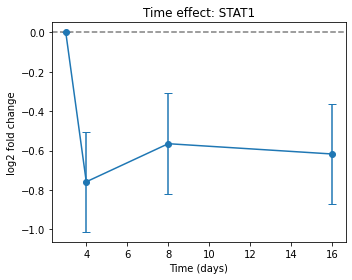

In [10]:
plot_time_effect(df_pq, "STAT1")

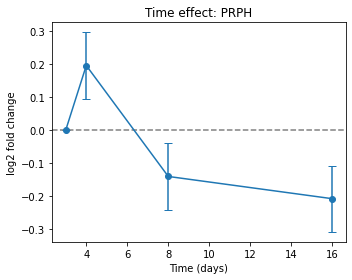

In [11]:
plot_time_effect(df_pq, "PRPH")